STA_141C_final_project

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Dataset Preprocessing

In [2]:
df = pd.read_csv("./pppub23.csv")

df= df[['WEIND', 'PRDTRACE', 'PEHRUSLT', 'HEA', 'EIT_CRED', 'OI_OFF', 'A_WKSTAT', 'NOEMP', 'PTOT_R', 'AGE1', 'A_HGA', 'A_MARITL', 'A_SEX', 'MIG_ST', 'CLWK']]
df= df.rename(columns={
    'WEIND': 'Industry',
    'PRDTRACE': 'Race',
    'PEHRUSLT': 'Hours Worked',
    'HEA': 'Health Status',
    'EIT_CRED': 'Income Tax',
    'OI_OFF': 'Income Sources',
    'A_WKSTAT': 'Full/Part Status',
    'NOEMP': 'Company Size',
    'PTOT_R': 'Income',
    'AGE1': 'Age',
    'A_HGA': 'Education',
    'A_MARITL': 'Marital Status',
    'A_SEX': 'Gender',
    'MIG_ST': 'Residence',
    'CLWK': 'Job Class'
})

df.head()


,Industry,Race,Hours Worked,Health Status,Income Tax,Income Sources,Full/Part Status,Company Size,Income,Age,Education,Marital Status,Gender,Residence,Job Class
0,23,1,-1,4,0,0,1,0,5,15,39,4,2,0,5
1,23,1,-1,4,0,0,1,0,7,15,39,4,2,0,5
2,23,1,-1,3,0,0,1,0,4,11,39,1,2,0,5
3,7,1,40,3,0,0,2,6,17,11,40,1,1,0,1
4,23,1,-1,4,0,0,1,0,6,17,39,4,2,0,5


In [3]:
df = pd.read_csv("./dataset.csv")

Logistic Regression

In [4]:
#logistic 1
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from numpy import mean
def income_class(income):
    if income in range(0, 20): 
        return 0
    else:  
        return 1

df['Income_class'] = df['Income'].apply(income_class)

X = df.drop(columns=['Income',"Income_class"])
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
y = df['Income_class']

logistic_2 = LogisticRegression()
accuracies = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    logistic_2.fit(X_train, y_train)
    y_pred = logistic_2.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
print(accuracies)
print(mean(accuracies))


[0.8474698053170014, 0.8480856742053581, 0.849899065932186, 0.8502360911517143, 0.8451036748101006]
0.8481588622832721


In [5]:
#logistic 2
def income_class(income):
    if income in range(0, 9): 
        return 0
    else:  
        return 1

df['Income_class'] = df['Income'].apply(income_class)

X = df.drop(columns=['Income',"Income_class"])
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
y = df['Income_class']

logistic_2 = LogisticRegression()
accuracies = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    logistic_2.fit(X_train, y_train)
    y_pred = logistic_2.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
print(accuracies)
print(mean(accuracies))


[0.8775789509699935, 0.8756286994901974, 0.8773052314640573, 0.8747348251556833, 0.8770957366728256]
0.8764686887505514


Decision Tree

In [6]:
#decision tree 1
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from numpy import mean
def income_class(income):
    if income in range(0, 20): 
        return 0
    else:  
        return 1

df['Income_class'] = df['Income'].apply(income_class)

X = df.drop(columns=['Income',"Income_class"])
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
y = df['Income_class']

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
accuracies = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
print(accuracies)
print(mean(accuracies))

[0.8334416806377665, 0.8338522598966709, 0.8331337461935882, 0.8379525080407856, 0.8328200916991719]
0.8342400572935966


In [7]:
#decision tree 2
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
from numpy import mean

def income_class(income):
    if income in range(0, 9): 
        return 0
    else:  
        return 1

df['Income_class'] = df['Income'].apply(income_class)

X = df.drop(columns=['Income',"Income_class"])
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
y = df['Income_class']

dt = DecisionTreeClassifier(max_depth=5, random_state=42)
accuracies = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
print(accuracies)
print(mean(accuracies))


[0.8909569918226298, 0.8871249187395217, 0.8860300407157765, 0.8842126873331965, 0.8880448915349346]
0.8872739060292119


Random Forest

[0.8520203921031922, 0.85366270913881, 0.8526362609915489, 0.8533497570656265, 0.8487305823581742]
0.8520799403314703


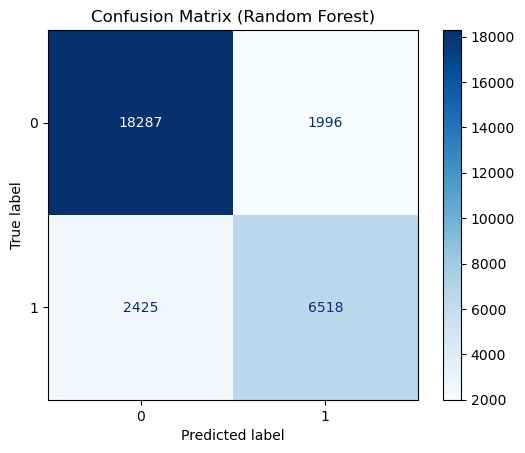

In [8]:
#random forest model 
#2 class 
from sklearn.model_selection import KFold
from numpy import mean
def income_class(income):
    if income in range(0, 20): 
        return 0
    else:  
        return 1

df['Income_class'] = df['Income'].apply(income_class)
X = df.drop(columns=['Income',"Income_class"])
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
y = df['Income_class']
kf = KFold(n_splits=5, shuffle=True, random_state=42)

rf_2 = RandomForestClassifier(n_estimators=100, random_state=42)
accuracies = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf_2.fit(X_train, y_train)
    y_pred = rf_2.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
print(accuracies)
print(mean(accuracies))
#confusion matrix
y_pred = rf_2.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

[0.8898278988606425, 0.8884250863927191, 0.8889725254045916, 0.8870868404845001, 0.8907137480325737]
0.8890052198350056


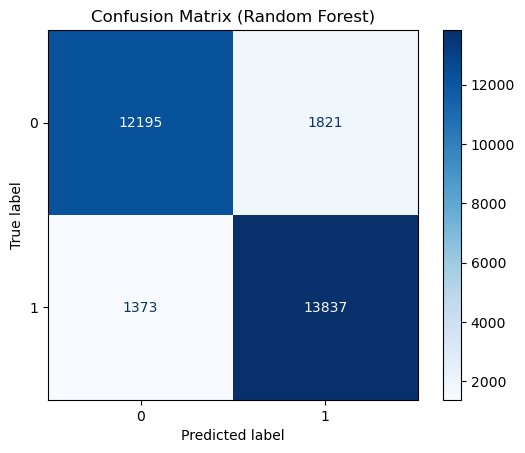

In [9]:
#random forest model 
#2 class 
from sklearn.model_selection import KFold
from numpy import mean

def income_class(income):
    if income in range(0, 9): 
        return 0
    else:  
        return 1

df['Income_class'] = df['Income'].apply(income_class)
X = df.drop(columns=['Income',"Income_class"])
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
y = df['Income_class']
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf_2 = RandomForestClassifier(n_estimators=100, random_state=42)

accuracies = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    rf_2.fit(X_train, y_train)
    y_pred = rf_2.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)
    
print(accuracies)
print(mean(accuracies))

#confusion matrix
y_pred = rf_2.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

In [10]:
#best subset
import random
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import itertools
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tqdm import tqdm

def income_class(Income):
    if Income in range(0, 20):
        return 0
    else:
        return 1

random.seed(42)
df = pd.read_csv("./dataset.csv")
X = df.drop(columns='Income')
df['Income_class'] = df['Income'].apply(income_class)

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
y = df['Income_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def evaluate_model(X_train, y_train, X_test, y_test, feature_indices):

    X_train_subset = X_train[:, feature_indices]
    X_test_subset = X_test[:, feature_indices]

    # Train a random forest classifier
    rf = RandomForestClassifier(n_estimators=5, random_state=42)
    rf.fit(X_train_subset, y_train)

    y_pred = rf.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Number of features to select
k = 5

# Generate all combinations of k features
combinations = list(itertools.combinations(range(X.shape[1]), k))

best_score = 0
best_combination = []

for combination in tqdm(combinations):
    score = evaluate_model(X_train, y_train, X_test, y_test, combination)
    if score > best_score:
        best_score = score
        best_combination = combination

new_df = df.drop(columns='Income')
best_feature_names = [new_df.columns[i] for i in best_combination]
print(f"Best combination of {k} features: {best_feature_names}")
print(f"Best accuracy: {best_score}")


100%|██████████| 2002/2002 [04:33<00:00,  7.33it/s]

Best combination of 5 features: ['Industry', 'Income Tax', 'Full/Part Status', 'Age', 'Education']
Best accuracy: 0.8458617032196257


In [11]:
#best subset
import random
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import itertools
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tqdm import tqdm

def income_class(Income):
    if Income in range(0, 9):
        return 0
    else:
        return 1

random.seed(42)
df = pd.read_csv("./dataset.csv")
X = df.drop(columns='Income')
df['Income_class'] = df['Income'].apply(income_class)

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
y = df['Income_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def evaluate_model(X_train, y_train, X_test, y_test, feature_indices):

    X_train_subset = X_train[:, feature_indices]
    X_test_subset = X_test[:, feature_indices]

    # Train a random forest classifier
    rf = RandomForestClassifier(n_estimators=5, random_state=42)
    rf.fit(X_train_subset, y_train)

    y_pred = rf.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Number of features to select
k = 5

# Generate all combinations of k features
combinations = list(itertools.combinations(range(X.shape[1]), k))

best_score = 0
best_combination = []

for combination in tqdm(combinations):
    score = evaluate_model(X_train, y_train, X_test, y_test, combination)
    if score > best_score:
        best_score = score
        best_combination = combination

new_df = df.drop(columns='Income')
best_feature_names = [new_df.columns[i] for i in best_combination]
print(f"Best combination of {k} features: {best_feature_names}")
print(f"Best accuracy: {best_score}")


100%|██████████| 2002/2002 [05:50<00:00,  5.72it/s]

Best combination of 5 features: ['Income Tax', 'Full/Part Status', 'Age', 'Education', 'Job Class']
Best accuracy: 0.8864064050364389


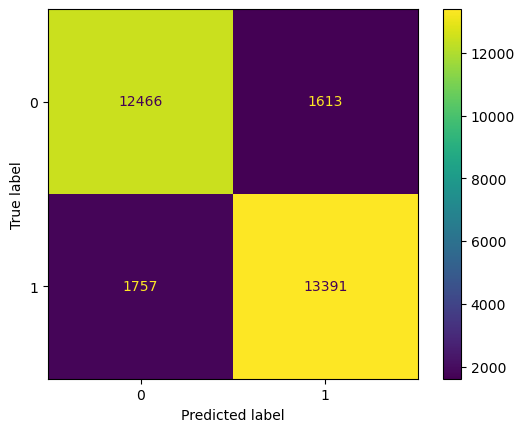

In [12]:
from numpy import mean
import random
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import itertools
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from tqdm import tqdm
from matplotlib import pyplot as plt
#Model on features in the best subset 
X_small = df[['Industry', 'Income Tax', 'Full/Part Status', 'Age', 'Education']]
y_small = y
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X_small)
y = df['Income_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

bs_rf = RandomForestClassifier(n_estimators=5, random_state=42)

bs_rf.fit(X_train, y_train)


y_pred = bs_rf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [13]:
#PCA
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


X = df.drop(columns=['Income'])

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
X_pca = pca.fit_transform(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
components_df = pd.DataFrame({'Explained Variance Ratio': explained_variance_ratio}, index=[f'PC{i+1}' for i in range(len(X.columns))])
print("Explained Variance Ratio for Each Principal Component:")
print(components_df)

column_names = X.columns

n_components = 7
selected_features = pca.components_[:n_components]
selected_features_df = pd.DataFrame(selected_features, columns=column_names)
print(f"\nSelected Features (top {n_components}):")
print(selected_features_df)


Explained Variance Ratio for Each Principal Component:
      Explained Variance Ratio
PC1                   0.365105
PC2                   0.236062
PC3                   0.151566
PC4                   0.082354
PC5                   0.052098
PC6                   0.038968
PC7                   0.017458
PC8                   0.015780
PC9                   0.009898
PC10                  0.006499
PC11                  0.006266
PC12                  0.006225
PC13                  0.006115
PC14                  0.002899
PC15                  0.002707

Selected Features (top 7):
   Industry      Race  Hours Worked  Health Status  Income Tax  \
0 -0.323243  0.004713     -0.075182      -0.095349   -0.006026   
1  0.417847 -0.000054     -0.120902       0.119458   -0.002735   
2  0.085169 -0.000645     -0.035753       0.054473   -0.017248   
3  0.300230  0.007326      0.036117       0.025955    0.009514   
4  0.139731  0.004089      0.044117      -0.132502    0.024829   
5 -0.171527  0.005258    

In [14]:
#kfold on PCA 1
def income_class(Income):
    if Income in range(0, 20):
        return 0
    else:
        return 1
df['Income_class'] = df['Income'].apply(income_class)

X = df.drop(columns=['Income', 'Income_class'])
y = df['Income_class']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

pca_rf = RandomForestClassifier(n_estimators=100, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(pca_rf, X_pca, y, cv=kf, scoring='accuracy')

for fold, score in enumerate(cv_scores, 1):
    print(f"Fold {fold} Accuracy: {score}")
print(f"Mean Accuracy: {np.mean(cv_scores)}")

Fold 1 Accuracy: 0.8276251411366202
Fold 2 Accuracy: 0.8270092722482636
Fold 3 Accuracy: 0.8284120847161871
Fold 4 Accuracy: 0.8300143707657566
Fold 5 Accuracy: 0.8254294121672483
Mean Accuracy: 0.8276980562068152


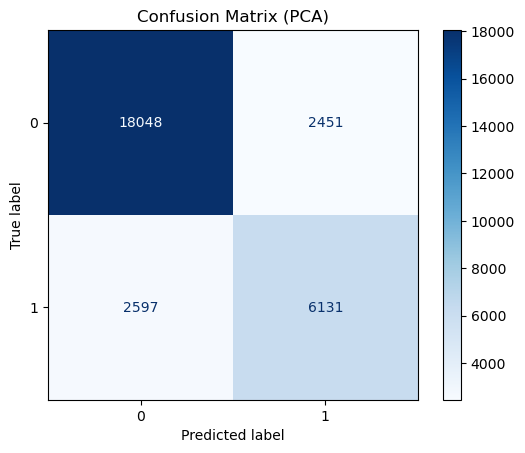

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
pca_rf = RandomForestClassifier(n_estimators=100, random_state=42)
pca_rf.fit(X_train, y_train)
y_pred = pca_rf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (PCA)')
plt.show()

In [16]:
#kfold on PCA 2
def income_class(Income):
    if Income in range(0, 9):
        return 0
    else:
        return 1
df['Income_class'] = df['Income'].apply(income_class)

X = df.drop(columns=['Income', 'Income_class'])
y = df['Income_class']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

pca_rf = RandomForestClassifier(n_estimators=100, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(pca_rf, X_pca, y, cv=kf, scoring='accuracy')

for fold, score in enumerate(cv_scores, 1):
    print(f"Fold {fold} Accuracy: {score}")
print(f"Mean Accuracy: {np.mean(cv_scores)}")

Fold 1 Accuracy: 0.8755602696137134
Fold 2 Accuracy: 0.8719677010982995
Fold 3 Accuracy: 0.8727204297396243
Fold 4 Accuracy: 0.8730582358174228
Fold 5 Accuracy: 0.8762403339492233
Mean Accuracy: 0.8739093940436566


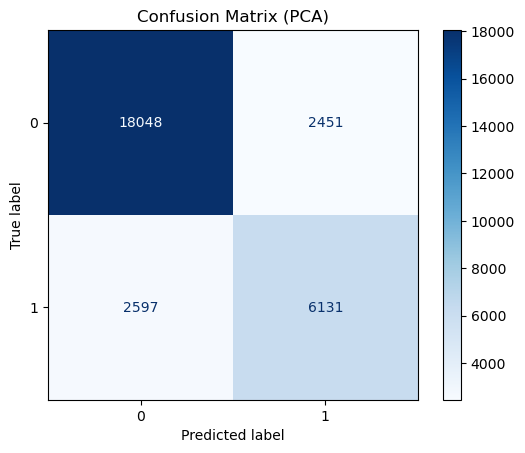

In [17]:
pca_rf = RandomForestClassifier(n_estimators=100, random_state=42)
pca_rf.fit(X_train, y_train)
y_pred = pca_rf.predict(X_test)
cm=confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix (PCA)')
plt.show()

Further Evaluation

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def model_evaluation(X_test, y_test, model):
    y_pred = model.predict(X_test)
    result = {"Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred),
        "Confusion matrix": confusion_matrix(y_test, y_pred)}
    print(result)

def income_class_mean(income):
    if income in range(0, 20): 
        return 0
    else:  
        return 1
    
def income_class_median(income):
    if income in range(0, 20): 
        return 0
    else:  
        return 1

In [19]:
df['Income_class'] = df['Income'].apply(income_class_median)
X = df.drop(columns=['Income',"Income_class"])
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
y = df['Income_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_evaluation(X_test, y_test, rf_2) #Models:logistic2, dt, rf_2

{'Accuracy': 0.7677147842748144, 'Precision': 0.5636447187028163, 'Recall': 0.983730522456462, 'F1-score': 0.7166645799424064, 'Confusion matrix': array([[13852,  6647],
       [  142,  8586]], dtype=int64)}


In [24]:
#best subset from 1 to 4
import random
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

def income_class(Income):
    if Income in range(0, 20):
        return 0
    else:
        return 1

random.seed(42)
df = pd.read_csv("./dataset.csv")
X = df.drop(columns='Income')
df['Income_class'] = df['Income'].apply(income_class)

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
y = df['Income_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def evaluate_model(X_train, y_train, X_test, y_test, feature_indices):
    X_train_subset = X_train[:, feature_indices]
    X_test_subset = X_test[:, feature_indices]
    rf = RandomForestClassifier(n_estimators=5, random_state=42)
    rf.fit(X_train_subset, y_train)
    y_pred = rf.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

for k in range(1, 5):
    best_score = 0
    best_combination = []
    combinations = list(itertools.combinations(range(X.shape[1]), k))
    for combination in tqdm(combinations):
        score = evaluate_model(X_train, y_train, X_test, y_test, combination)
        if score > best_score:
            best_score = score
            best_combination = combination
    
    new_df = df.drop(columns='Income')
    best_feature_names = [new_df.columns[i] for i in best_combination]
    print(f"Best combination of {k} features: {best_feature_names}")
    print(f"Best accuracy: {best_score}")

100%|██████████| 14/14 [00:00<00:00, 18.77it/s]


Best combination of 1 features: ['Hours Worked']
Best accuracy: 0.794607725733055


100%|██████████| 91/91 [00:06<00:00, 14.52it/s]


Best combination of 2 features: ['Hours Worked', 'Education']
Best accuracy: 0.8248195162007732


100%|██████████| 364/364 [00:29<00:00, 12.21it/s]


Best combination of 3 features: ['Hours Worked', 'Income Tax', 'Education']
Best accuracy: 0.8335101105142505


100%|██████████| 1001/1001 [01:49<00:00,  9.15it/s]

Best combination of 4 features: ['Industry', 'Income Tax', 'Full/Part Status', 'Education']
Best accuracy: 0.8427481438396004


In [23]:
#best subset 2
import random
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm

def income_class(Income):
    if Income in range(0, 9):
        return 0
    else:
        return 1

random.seed(42)
df = pd.read_csv("./dataset.csv")
X = df.drop(columns='Income')
df['Income_class'] = df['Income'].apply(income_class)

min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
y = df['Income_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


def evaluate_model(X_train, y_train, X_test, y_test, feature_indices):
    X_train_subset = X_train[:, feature_indices]
    X_test_subset = X_test[:, feature_indices]
    rf = RandomForestClassifier(n_estimators=5, random_state=42)
    rf.fit(X_train_subset, y_train)
    y_pred = rf.predict(X_test_subset)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

for k in range(1, 5):
    best_score = 0
    best_combination = []
    combinations = list(itertools.combinations(range(X.shape[1]), k))
    for combination in tqdm(combinations):
        score = evaluate_model(X_train, y_train, X_test, y_test, combination)
        if score > best_score:
            best_score = score
            best_combination = combination
    
    new_df = df.drop(columns='Income')
    best_feature_names = [new_df.columns[i] for i in best_combination]
    print(f"Best combination of {k} features: {best_feature_names}")
    print(f"Best accuracy: {best_score}")


100%|██████████| 14/14 [00:00<00:00, 16.43it/s]


Best combination of 1 features: ['Job Class']
Best accuracy: 0.8393608649536387


100%|██████████| 91/91 [00:06<00:00, 13.11it/s]


Best combination of 2 features: ['Industry', 'Age']
Best accuracy: 0.8636876860437267


100%|██████████| 364/364 [00:32<00:00, 11.28it/s]


Best combination of 3 features: ['Age', 'Education', 'Job Class']
Best accuracy: 0.8767235775139426


100%|██████████| 1001/1001 [02:00<00:00,  8.32it/s]

Best combination of 4 features: ['Income Tax', 'Age', 'Education', 'Job Class']
Best accuracy: 0.8851404523214835
